In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from datetime import datetime
from zipline.api import symbol, order_target_percent, schedule_function, date_rules, time_rules

from zipline import run_algorithm

import pytz

import pyfolio as pf

In [2]:
djia_stocks = [
    'AAPL',
    'AXP',
    'BA',
    'CAT',
    'CSCO',
    'CVX',
    'DIS',
    'DWDP',
    'GS',
    'HD',
    'IBM',
    'INTC',
    'JNJ',
    'JPM',
    'KO',
    'MCD',
    'MMM',
    'MRK',
    'MSFT',
    'NKE',
    'PFE',
    'PG',
    'TRV',
    'UNH',
    'UTX',
    'V',
    'VZ',
    'WBA',
    'WMT',
    'XOM'
]

Start date,2003-01-02
End date,2017-12-29
Total months,179
,Backtest
Annual return,9.6%
Cumulative returns,295.2%
Annual volatility,18.2%
Sharpe ratio,0.60
Calmar ratio,0.17
Stability,0.78
Max drawdown,-58.2%


/home/sergio/anaconda3/envs/zip35/lib/python3.5/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: 'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,58.17,2007-10-31,2009-03-09,2013-03-22,1408
1,12.98,2015-07-16,2015-08-25,2016-03-11,172
2,11.09,2004-03-05,2004-08-06,2004-10-06,154
3,10.16,2007-07-19,2007-08-16,2007-10-29,73
4,10.00,2003-01-06,2003-03-11,2003-03-21,55


,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_exposure,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2003-01-02 00:00:00+00:00,NaN,0.000000,None,0.0,NaN,None,0.000000,10000.000000,0.000,0.000,...,0.0,0.0,0,NaN,10000.000000,0.000,0.000,1,[],0.0
2003-01-03 00:00:00+00:00,0.005758,-0.000513,None,0.0,0.0,None,-9798.646759,201.353241,9793.517,9793.517,...,0.0,0.0,0,-11.224972,10000.000000,0.000,0.000,2,"[{'commission': None, 'amount': 33, 'sid': Equ...",0.0
2003-01-06 00:00:00+00:00,0.188445,0.019776,None,0.0,0.0,None,0.000000,201.353241,9996.410,9996.410,...,0.0,0.0,0,353.522381,201.353241,9793.517,9793.517,3,[],0.0
2003-01-07 00:00:00+00:00,0.202427,0.009602,None,0.0,0.0,None,0.000000,201.353241,9894.670,9894.670,...,0.0,0.0,0,7.794368,201.353241,9996.410,9996.410,4,[],0.0
2003-01-08 00:00:00+00:00,0.223167,-0.007561,None,0.0,0.0,None,0.000000,201.353241,9723.040,9723.040,...,0.0,0.0,0,-2.588631,201.353241,9894.670,9894.670,5,[],0.0
2003-01-09 00:00:00+00:00,0.219319,0.004928,None,0.0,0.0,None,0.000000,201.353241,9847.930,9847.930,...,0.0,0.0,0,1.773014,201.353241,9723.040,9723.040,6,[],0.0
2003-01-10 00:00:00+00:00,0.203010,0.000204,None,0.0,0.0,None,0.000000,201.353241,9800.685,9800.685,...,0.0,0.0,0,0.205153,201.353241,9847.930,9847.930,7,[],0.0
2003-01-13 00:00:00+00:00,0.188142,0.001813,None,0.0,0.0,None,0.000000,201.353241,9816.777,9816.777,...,0.0,0.0,0,0.637367,201.353241,9800.685,9800.685,8,[],0.0
2003-01-14 00:00:00+00:00,0.176338,0.004197,None,0.0,0.0,None,0.000000,201.353241,9840.620,9840.620,...,0.0,0.0,0,1.222199,201.353241,9816.777,9816.777,9,[],0.0
2003-01-15 00:00:00+00:00,0.176876,-0.007358,None,0.0,0.0,None,0.000000,201.353241,9725.070,9725.070,...,0.0,0.0,0,-1.469836,201.353241,9840.620,9840.620,10,[],0.0


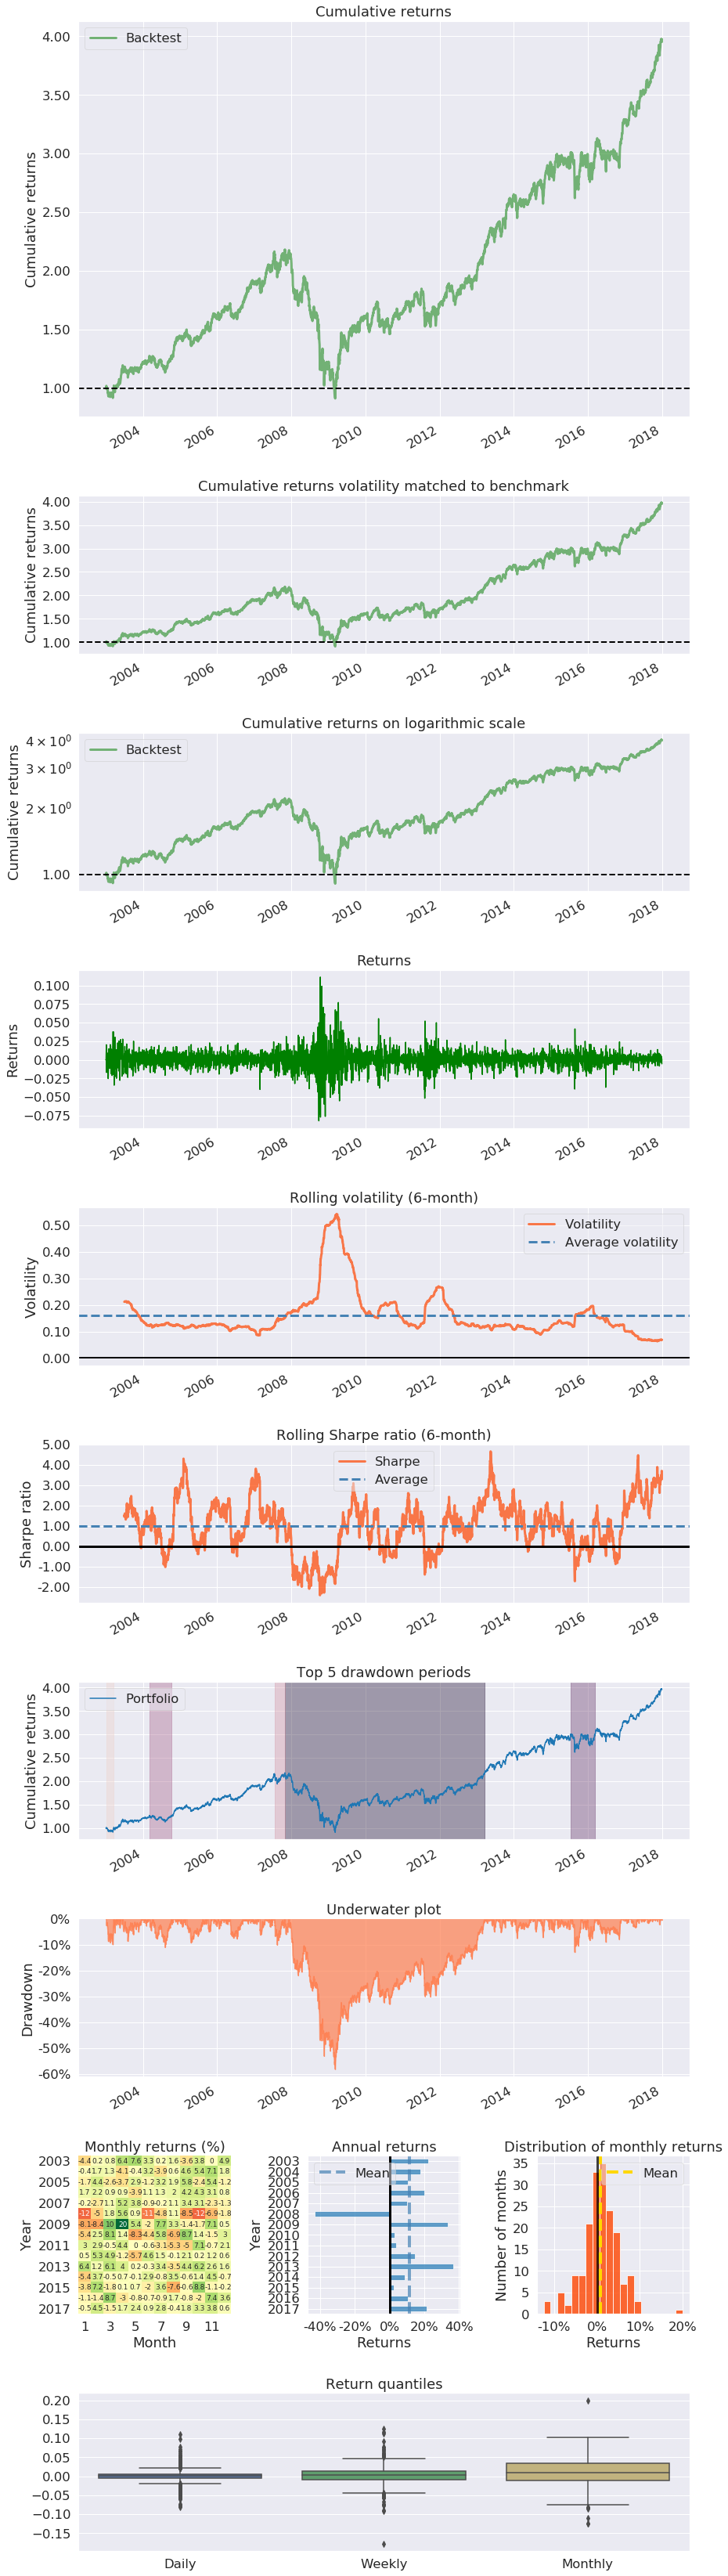

In [3]:
def initialize(context):
    context.universe = [symbol(s) for s in djia_stocks]
    
    #History, 20 days in 1 month
    context.history_window = 20
    
    #portfolio size
    context.stocks_to_hold = 10
    
    #change scheduling to once per month
    schedule_function(handle_data, date_rule= date_rules.month_start(), time_rule=time_rules.market_close())

def month_perf(ts):
    perf = (ts[-1] / ts[0]) - 1
    return perf

def handle_data(context, data):
    
    #20 days history per stock
    hist = data.history( context.universe, 'close' , context.history_window, '1d' )
    
    #table of % returns, ascending order
    perf_table = hist.apply(month_perf).sort_values(ascending=False)
    
    #make buy list
    buy_list = perf_table[ :context.stocks_to_hold ]
    
    #the rest (no buy)
    
    the_rest = perf_table[ context.stocks_to_hold: ]
    
    #place buy orders
    for stock, perf in buy_list.iteritems():
        stock_weight = 1 / context.stocks_to_hold
        if data.can_trade(stock):
            order_target_percent(stock, stock_weight)
            
    #make sure flat on the rest
    
    for stock, perf in the_rest.iteritems():
        if data.can_trade(stock):
            order_target_percent(stock, 0.0)
            
def analyze(contex, perf):
    #use pyfolio to generate analysis
    returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(perf)
    pf.create_returns_tear_sheet(returns, benchmark_rets=None)
    
start = datetime(2003, 1, 1, tzinfo=pytz.UTC)
end = datetime(2017, 12, 31, tzinfo=pytz.UTC)

run_algorithm(start=start, 
              end=end, 
              initialize=initialize, 
              analyze=analyze,
              capital_base=10000, 
             data_frequency='daily',
             bundle='quandl')
    
    